# Chapter 8 - 회색도 변환

## 1. 소개

#### 이번 단원과 9, 10단원에서는 공간 영역에서의 영상 강화를 다룬다. 영상 강화는 1단원에서 짚었던 대로 다음들을 다룬다 -

* 사람이 보는 영상의 질을 높이기 위해서
* 다른 분석과 내용의 자동 추출을 더 편리하게 하려고 수정하기 위해서

#### 첫 번째 경우의 예시로는 골절의 가능성을 진단하기 위한 개선된 X레이 영상이 있다.
#### 두 번째 경우의 목적은 영상의 의미있는 내용들을 얻기 위한 중간 단계를 수행하기 위함이다. 예를 들면, OCR 알고리즘을 적용하기 전에 글과 그 배경을 구분하기 위해 그 둘의 차이를 강화하는 작업이 있다.
#### 두 과정이 서로의 목적을 위해 쓰일 때도 있다. 사람이 보기에 더 편하게 영상을 결이 곱고 선명하게 만들거나, 필요 없는 정보를 줄이기 위해 영상을 흐리게 하는 것들이 그것이다. 두 과정이 1 - 영상이 개선을 필요로 할 때- 과 2 - 낮은 단계의 모양들을 찾아야 할 때 -  모두의 목적을 위해 사용될 때가 있다. 따라서 영상 강화는 중요한 영상의 자세한 사항들이 사람이나 기계에게 발견되기 쉽게 개선한다.
#### 이 과정은 질이 저하된 영상을 복구하는 것과는 다르다. 이것은 12단원 영상 복구 기술에서 다룬다.

#### 또 이미지 강화는 목적에 따라서 다양하다는 점이 중요한데, 이것은 영상 강화에 대한 일반적인 이론이나 언제나 완벽한 수행을 하는 보편적인 강화 알고리즘이 없다는 것이다. 게다가 이미지 강화는 사람의 전문화된 기술들과 문제 영역에 대한 사전 지식이 중요한 역할을 하는 주관적인 수행이다. 예를 들어 방사선 전문가는 전문화된 지식이 없는 사람이 구별하지 못하는 X선 사진들간의 질적 차이점을 찾아낼 수 있다.
#### 이번 단원은 입력 영상을 강화하기 위해 사용하는 점 연산에 집중한다. 몇 가지 경우에 강화의 결과는 사람의 시각을 목표로 하지만, 다른 경우에는 MVS에서 수행하기 위한 입력 영상을 만드는 곳에 초점을 맞춘다.

## 2. 회색도 변환의 개요

#### 점 연산들은 '회색도 변환' 또는 공간 변환이라고도 불린다. 그 연산들은 $g(x,y)$가 처리된 영상,$f(x,y)$는 원본 영상, 그리고 $T$는 $f(x,y)$에 대한 연산이라고 할 때, 
$g(x,y) = T[f(x,y)] $
#### 로 나타내질 수 있다.
#### 좌표 자체는 변환 함수가 원본 영상에 하는 수행에 미치는 영향이 없으므로, 위의 방정식은 $r$이 원본 픽셀의 회색도, $s$가 변환된 회색도라고 할 때 
$s=T[r]$
#### 로 나타낼 수 있다.
#### 점 변환들은 선형(예 : 반전), 구분적 선형(예 : 회색도 슬라이싱), 혹은 비선형(예 : 감마 정정) 변환함수일 수 있다.
#### 점 연산들은 결과 픽셀의 좌표 $(x_0,y_0)$가 같은 좌표의 원본 픽셀에만 의존하는 간단한 사상 연산으로 볼 수 있다. 다른 말로, 결과 영상은 원본 영상과 어떤 크기, 기하/국소적 구조적 차이도 만들어내지 않는다.
#### 이 책에서 우리는 간단한 선형 방정식으로 표현될 수 있는 변환들을 선형 점 변환이라고 부른다. 이 선형 방정식은 원본 픽셀값이 $r$, 결과 픽셀값이 $s$, 결과값과 대조를 조정할 수 있는 상수$c$, 그리고 결과 영상의 전체적 밝기에 영향을 미치는 상수 $b$에 대해
$s=c \cdot r+b$
#### 로 나타낼 수 있다.
#### 도표적 관점에서, $r$에 대한 $s$의 함수를 그려보면 기울기가 상수 $c$이고 $y$절편이 상수 $b$인 직선을 그릴 것이다. 픽셀의 결과값은 특정한 범위(0-255)의 값밖에 가지지 못하므로, 결과 도표는 자주 값을 범위 안에 보존하기 위해 255를 넘는 곳과 0보다 작아지는 곳에서 클램핑을 가리키는 수평선을 그린다.
#### 만일 점 변환 함수가 각 구간의 회색도 값에 따른 몇 가지의 선형 방정식으로 이루어져 있다면, 우리는 그 변환을 구분적 선형이라고 부른다.
#### 하나 혹은 그 이상의 선형방정식으로 나타낼 수 없는 변환 함수들을 비선형이라고 한다. 멱법칙과 로그 변환들이 그 예이다.

### 예제 1

#### 하나의 원본 영상에  $c$와 $b$값을 각각 2와 32를 적용한 많은 포화 픽셀들을 포함하며 전체적으로 밝게 만들기, 1과 -56을 적용한 전체적으로 어둡게 만들기, 0.3과 0을 적용한 대조 감소 이 세 가지 다른 선형 점 변환을 할 것이다.
#### 원본 영상 :

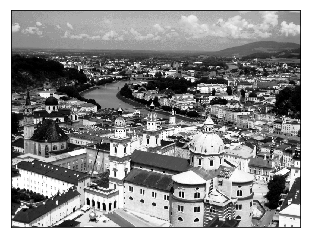

In [3]:
import numpy as np
import pylab as plt
I=plt.imread('salzburg.png')
I=(255*I).astype('uint8')
plt.imshow(I,cmap=plt.cm.gray)
plt.xticks([],[])
plt.yticks([],[])
plt.show()

#### 변환 영상 :

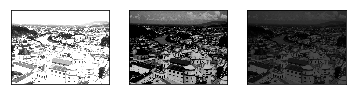

In [63]:
I2=np.where((2*I.astype('uint16')+32)>255,255,2*I+32)
plt.subplot(1,3,1)
plt.imshow(I2,cmap=plt.cm.gray,vmin=0)
plt.xticks([],[])
plt.yticks([],[])
I3=np.where((I.astype('int')-56)<0,0,(I-56))
plt.subplot(1,3,2)
plt.imshow(I3,cmap=plt.cm.gray,vmax=255)
plt.xticks([],[])
plt.yticks([],[])
I4=0.3*I
plt.subplot(1,3,3)
plt.imshow(I4,cmap=plt.cm.gray,vmax=255)
plt.xticks([],[])
plt.yticks([],[])
plt.show()

## 3. 점 변환의 예제들

#### 이번 단원에는 가장 널리 사용되는 점 변환들을 다룬다.

### 3.1 대조 조작

#### 점 변환 함수의 가장 대표적인 활용 중 하나는 대조 조작이다. 이 함수들은 시그모이드 함수를 닮아, $m$보다 작은 값의 픽셀 값을 압축해서 어두운 값을 만들고, $m$보다 큰 값의 픽셀 값을 더 밝은 값으로 보낸다. 함수의 기울기는 대조가 얼마나 놀랍게 바뀔지를 결정한다. 가장 극단적인 경우, 대조 조작 함수는 $m$보다 작은 값을 검게, $m$보다 큰 값을 희게 만드는 이진화 함수가 된다.
#### 가장 유용한 대조 조작 함수들 중 하나는 가장 어두운 값을 0, 가장 밝은 값을 255로 맞추고 그 사이 값들을 선형으로 분포시키는 자동 대조 조정이다. 이 함수는 6단원의 정규화와 같은 알고리즘이다. MATLAB에서는 대조 조정을 수행하기 위한 함수인 $imadjust$를 제공한다. Tutorial 9.3에서 이 함수에 대해 다룬다. 상호적 밝기와 대조 조정은 4단원에서 배운 $imcontrast$를 통해서도 할 수 있다. 9단원에서 히스토그램 균등화와 히스토그램 늘림과 같은 기법들을 다룰 때 다시 이 부분을 다룬다.

#### 예시 : [90,162] 범위의 회색도 영상을 대조 조정을 적용한 결과

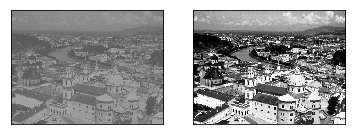

In [64]:
plt.subplot(1,2,1)
I1=(72/255)*I+90
plt.imshow(I1,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(1,2,2)
I2=255/72*(I1-90)
plt.imshow(I2,cmap=plt.cm.gray,vmin=0, vmax=255)
plt.xticks([],[])
plt.yticks([],[])
plt.show()

### 3.2 반전

#### 반전 점 변환 함수는 6.1.2에서 이미 다뤘다. 반전 변환은 결과물이 영상의 중요한 세부 사항들을 알기 쉽게 하는 것과 같은 일들을 하기 위해 사용된다. MATLAB에서는 $imcomplement$함수를 통해 영상의 반전을 구할 수 있었다.

### 3.3 멱 법칙(감마) 변환

#### 멱 법칙 변환은 다음과 같은 수식으로 나타낼 수 있다.
#### $s=c \cdot r^\gamma$
#### 여기서 $r$은 원본 영상의 픽셀 값, $s$는 결과 픽셀값, $c$는 조정 상수값, $\gamma$는 양수값이다. MATLAB에서는 $imadjust$를 사용해
#### $g = imadjust(f,[],[],gamma)$와 같이 감마 정정을 할 수 있다.

### 예제 2

#### 다음은 몇 가지 $\gamma$값들에 따른 위 방정식의 도표를 그린 것이다.

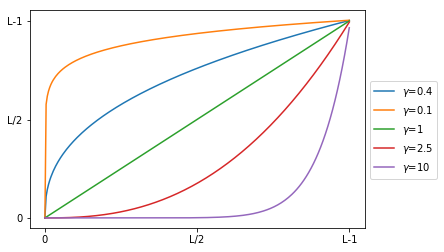

In [61]:
x=range(0,256)
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
for num in x:
    y1.append(num**0.4*(256**0.6))
    y2.append(num**0.1*(256**0.9))
    y3.append(num)
    y4.append(num**2.5/(256**1.5))
    y5.append(num**10/(256**9))
plt.plot(x,y1,label='$\gamma$=0.4')
plt.plot(x,y2,label='$\gamma$=0.1')
plt.plot(x,y3,label='$\gamma$=1')
plt.plot(x,y4,label='$\gamma$=2.5')
plt.plot(x,y5,label='$\gamma$=10')
plt.xticks([0,127,255],[0,'L/2','L-1'])
plt.yticks([0,127,255],[0,'L/2','L-1'])
plt.legend(bbox_to_anchor=(1,0.7))
plt.show()

#### 감마 값에 따른 감마 정정의 예. 왼쪽 : $\gamma$:0.5, 오른쪽 : $\gamma$:2.2

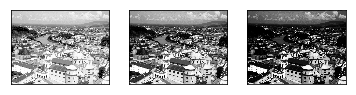

In [67]:
I2=I**0.5
plt.subplot(1,3,1)
plt.imshow(I2,cmap=plt.cm.gray,vmin=0)
plt.xticks([],[])
plt.yticks([],[])
plt.subplot(1,3,2)
plt.imshow(I,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.xticks([],[])
plt.yticks([],[])
I4=I.astype('float64')**2.2
plt.subplot(1,3,3)
plt.imshow(I4,cmap=plt.cm.gray,vmin=0)
plt.xticks([],[])
plt.yticks([],[])
plt.show()

### 3.4 로그 변환

#### 영상의 값의 범위를 압축하는데 쓰이는 로그 변환과 그 범위를 늘리는데 사용되는 로그 변환의 역은 비선형 함수들이다. 로그 변환은 다음과 같은 식으로 나타내질 수 있다.
$s = c \cdot log(1+r)$
#### 여기서 $r$은 원본 영상의 픽셀 값, $s$는 결과 픽셀 값, $c$는 상수이다.
#### 로그 변환의 많은 활용들에서 입력 "영상"은 우리가 주로 사용하는 흑백 영상의 회색도 값 안에 있지 않을 수 있다는 점에 주의하라.

### 예제 3

#### 이번 예제는 시각화의 강화와 푸리에 트랜스폼의 결과를 보이기 위해 로그 변환을 사용한다. 로그 변환은 [0,L]의 원본 영상 범위를 [0,log(L)]로 압축하여서, 원본 영상에서는 가운데 밝은 부분밖에 보지 못하지만 로그 변환된 영상은 중요한 다른 세부 사항들이 보이게 한다.

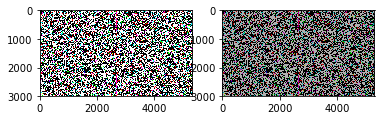

In [36]:
import math
I=plt.imread("temp5.png")
plt.subplot(1,2,1)
plt.imshow(I,cmap=plt.cm.gray,vmin=0,vmax=255)
I1=np.log(1+I)
plt.subplot(1,2,2)
plt.imshow(I1,cmap=plt.cm.gray,vmin=0,vmax=255)
plt.show()


### 3.5 구분 선형 변환

#### 구분 선형 변환은 각각 다른 회색도 구간을 정의역으로 하는 몇 개의 선형 방정식들로 표현될 수 있다. 구분 선형 변환은 내 마음대로 복잡하게 만들 수 있다는 것이 장점이지만, 주된 단점은 8.4에서 다룰 것처럼 추가적인 사용자의 입력 인수가 필요하다는 것이다.

### 예제 4

#### 아래는 구분 선형 변환을 사용해 입력 영상의 대조를 강화하는 예제이다. MATLAB에서는 GUI 토대로 만들어진 glsdemo함수를 통해 사용할 수 있다.

## 4. 변환함수 명시

#### 이번 단원에 등장한 변환 함수들은 연속/불연속 영역에서의 입력 영상에 대한 우아하고 적절한 수학식으로 표현될 수 있었다. 이번에는 우아함 대신에 명확한 수학적 명시가 언제나 실용적이지 않은 두 가지 이유를 제시한다. 그 둘은 다음과 같다.
* 사용자의 입장에서, 마우스와 GUI기반 활용(예를 들어, glsdemo 함수 사용)을 통해 필요한 점 변환 함수를 명시하는 것이 자주 선호되기 때문에.
* 계산 효율의 관점에서, 점 변환은 대조 테이블을 통한 매우 빠른 속도로 계산될 수 있다. uint8 영상에서 대조 테이블은 길이 256의 배열로 이루어져 있다. 대조 테이블은 MATLAB에서 다음 예제들과 같이 나타나진다.

#### MATLAB 사용자들은 다음 예제를 통해 비록 MATLAB이 코드 한 줄로 모든 픽셀에 점 변환을 적용하는 것을 아주 간단하게 만들어주지만, 미리 계산된 대조 테이블을 사용하는 것은 훨씬 더 계산적으로 효율적이라는 것을 알아야 한다.

## 튜토리얼 1. 회색도 변환들

### 목표 : 회색도 영상들에 기본적 점 변환 수행하는 법 배우기

### 진행
#### 1. 항등 변환 함수 만들기
#### 2. 변환 함수를  moon 사진에 적용해보고, 항등 함수가 어떻게 적용되는지 살피기

### 질문 1. 왜 I 대신 I+1을 사용했나??
### 질문 2. 변환 영상과 원본 영상이 같은 것을 어떻게 확인할 수 있나?
#### 반전 변환 함수는 반전된 영상을 만든다.
#### 3. 반전 변환 함수를 만들고 moon 영상에 적용해본 후 결과를 살피기

### 질문 3. 반전 변환 함수는 어떻게 만드는가?
#### 반전 변환의 결과는 영상에 논리적 보수를 취한것과 동일한 결과 영상을 만든다.
#### 4. 영상에 논리적 보수를 취해보고 그것이 반전 영상과 동일한지 살피기

#### 로그 변환 함수들은 원본 영상에서는 뚜렷하지 않은 모습들을 끌어내기 위해 값의 범위를 압축하는 데 사용될 수 있다, 로그 영상 함수는 앞의 식을 통해 적용될 수 있다. 
#### 5. 열린 창들을 닫고, 작업 공간의 변수들을 지우기
#### 6. 로그 변환 함수 만들기
#### 7. 로그 변환 함수를 영상에 적용해본 후 결과를 살피기
#### 8. 원본 영상에 단순 가산 연산을 적용해 영상을 밝게 만들어보고, 보이지 않던 세부사항들이 보이는지 살피기

### 질문 4. 왜 로그 변환된 영상은 가산 변환으로는 보이지 않는 세부사항들을 보이게 만들어주는가?
#### 로그 변환의 역함수는 다음과 같다.
$y(x)=exp(x/c)-1$;
#### 전과 같이, x는 원본 영상의 픽셀 값, c는 스케일링 상수이다. 우리가 방금 만들어낸 로그 변환 영상에 이 식을 적용해주면 원래 영상을 구할 수 있다는 것을 보일 수 있다.
#### 9. 역 로그변환을 통해 7의 변환 영상을 되돌리기

#### 멱 변환 함수들은 n제곱근과 n승 함수들을 포함한다. 이 함수들은 우리의 필요를 충족시켜줄 n 값을 정해줄 수 있기 때문에 로그 변환보다 훨씬 다재다능하다.
#### 10. 열린 창들을 닫고, 작업 공간의 변수들을 지우기
#### 11. 제곱근 함수 만들기
### 질문 5. 우리가 n 값을 바꿀 때마다 곡선의 모양이 어떻게 바뀌는가?
#### 12. 제곱근 함수를 통해 변환 영상 만들기

#### 우리는 원본 영상에서 볼 수 없던 세부 사항들이 변환 영상에서 나타나는 것을 볼 수 있다. n승 멱 변환 함수는 n제곱근 변환의 역함수이다.
#### 13. n승 멱 변환 함수 만들기
#### 14. n승 멱 변환 함수를 통해 n제곱근 변환된 영상 되돌리기
### 질문 6. 멱 변환된 영상과 원본 영상이 같다는 것을 보여라.

#### 우리가 살펴본 변환 함수들은 수학적 방정식으로 정의되었다. 다음 단계에서 우리는 특정한 수행을 하기 위해 구분적 선형 변환의 생성과 적용을 다룬다. 처음으로 살펴볼 예제는 우리가 나중 단계에서의 분석에 필요할 회색도 영상의 특정 단계를 강화시키는 회색도 슬라이싱이다.
#### 15. 열린 창들을 닫고, 작업 공간의 변수들을 지우기
#### 16. micro 사진을 불러오고 창 띄우기
#### 17. 변환 함수 만들기
### 질문 7. 이전 단계에 기반해서 이 변환 함수를 원본 영상에 적용할 때 어떤 효과를 기대하는가?
#### 18. 변환 영상 만들기

#### 이전 단계들에서, 우리는 특정 회색도 값들의 범위를 강화했고, 나머지 범위는 그대로 두었다. 변환 영상은 이 변화를 반영하지만, 주변의 다필요 없는 배경때문에 우리가 보고자 하는 강화된 픽셀을 보는 것은 아직 어렵다. 우리는 나머지 픽셀들을 상수로 놓음으로써 강화된 픽셀들을 따로 볼 수 있다.
#### 19. 새 변환 함수를 만들고 변환 영상 만들기

#### MATLAB에서는 위의 작업들을 사용자가 시각적으로 쉽게 GUI로 처리할 수 있도록 glsdemo 함수를 제공한다. 이 함수를 통해 지루하고 시간 소모적인 활동들을 줄일 수 있다.